In [1]:
import pandas as pd
import numpy as np

In [ ]:
#its unsupervised so no need to divide into train and test
# step 1 - to find the distance b.w. obs

# step 2 - find the linkage b.w. the groups


# min distance b.w. the points - single linkage

# max distance b.w. the points - complete linkage


# CM of the points - centrod linkage


# SS of the points - Ward method 

In [4]:
clus=pd.read_csv('../course3/dataset/cluster_example.csv')
clus.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [5]:
clus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [6]:
clus.isnull().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
# scale only the numeric columns
Uni=clus.iloc[:,1:]

In [10]:
Uni_s=scaler.fit_transform(Uni)

In [11]:
Uni_s.mean(axis=0)

array([-5.15143483e-16, -2.08721929e-16, -1.33226763e-16, -1.90958360e-16,
       -8.88178420e-18,  1.42108547e-16])

In [12]:
Uni_s.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

In [13]:
# find the distances b.w. these points
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

#linkage function to determine which 2 clusters should be combined together
# single - min dist
# complete - max dist
# ward method - the max incremental inc in the  Within SS ( l0 - (l1+l2))

#centroid - center of mass

In [14]:
# linkage( data, method =)

link=linkage(Uni_s,method='ward')

In [17]:
link

array([[11.        , 21.        ,  0.40302804,  2.        ],
       [ 8.        , 24.        ,  0.5087704 ,  2.        ],
       [12.        , 22.        ,  0.51397265,  2.        ],
       [ 5.        ,  6.        ,  0.66550071,  2.        ],
       [16.        , 28.        ,  0.75373329,  3.        ],
       [ 4.        ,  7.        ,  0.79027529,  2.        ],
       [10.        , 29.        ,  0.91291034,  4.        ],
       [ 0.        , 30.        ,  0.98118295,  3.        ],
       [ 3.        , 25.        ,  1.08900583,  3.        ],
       [14.        , 26.        ,  1.30438388,  3.        ],
       [32.        , 33.        ,  1.37852121,  6.        ],
       [31.        , 34.        ,  1.44265322,  7.        ],
       [13.        , 23.        ,  1.49124404,  2.        ],
       [19.        , 35.        ,  1.98145569,  7.        ],
       [ 1.        ,  9.        ,  2.09832721,  2.        ],
       [27.        , 38.        ,  2.18701731,  9.        ],
       [15.        , 37.

In [18]:
link.shape

(24, 4)

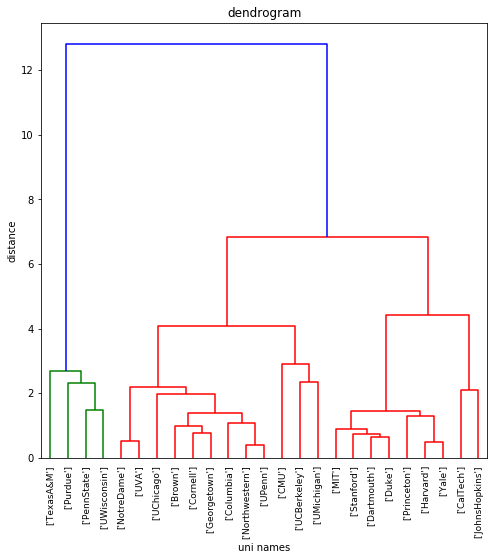

In [19]:
# dendrogram
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

plt.figure(figsize=(8,8))
plt.xlabel('uni names')
plt.ylabel('distance')
plt.title('dendrogram')
lab=np.array(clus[['Univ']])
dendrogram(link,labels=lab,leaf_rotation=90,leaf_font_size=9);



In [ ]:
# for finding the optimum no of cluster-

# i want to have 4 clusters

# then divide these colleges into 4 groups

# fcluster - flat clusters

# this assigns the obs into different clusters

# t = n , then the fcluster will not create more than n clusters (here determine by Kmeans - the optimum no of clusters)

# criterion -maxclust 

In [20]:
clus_label=fcluster(link,t=4,criterion='maxclust')

In [21]:
clus_label

array([2, 4, 2, 2, 2, 3, 3, 2, 3, 4, 3, 2, 2, 1, 3, 1, 3, 1, 2, 2, 2, 2,
       2, 1, 3], dtype=int32)

In [22]:
# we need to assign the cluster label to the obs

univ_clus=clus.assign(Cluster=clus_label)
univ_clus

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,4


### partitive clustering


#### KMeans

In [23]:
from sklearn.cluster import KMeans

n_clusters=no of clusters beforehand

init= how to set the initial seeds (random, kmeans++) 

max_iter - max no of times the algorithm will run for a specific iteration

n_init = no of times the algorithm will run with different centers of clusters tolerance

In [29]:
kmeans_clus=KMeans(n_clusters=4,init='k-means++',n_init=10)

In [30]:
kmeans_clus.fit(Uni_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
kmeans_clus.cluster_centers_

array([[ 0.80273428,  0.68086062, -0.90136381, -0.43159988,  0.44062556,
         0.79526289],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221],
       [ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ]])

In [32]:
# which obs to go to which cluster
kmeans_clus.labels_

array([0, 3, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0], dtype=int32)

In [33]:
kmeans_clus.max_iter

300

In [37]:
## inertia - total within SS of the points inside the clusters
#( ssw1+ssw2+ssw3+ssw4)

#what does this number imply for the cluster?
kmeans_clus.inertia_

33.654341806512235

In [38]:
# elbow curve
# clusters from 1-15
cluster_range=range(1,16)

In [39]:
SSWithin=[]


In [40]:
for i in cluster_range:
    kmeans_clus=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=30)
    kmeans_clus.fit(Uni_s)
    SSWithin.append(kmeans_clus.inertia_)
    

In [41]:
# total SS within for clusters from 1-15
SSWithin

[150.0,
 64.14528395010268,
 44.531761731450956,
 33.654341806512235,
 26.785713479514527,
 22.87523336788685,
 18.618367158890123,
 16.048447747151442,
 13.267235048457902,
 10.491071479134543,
 8.289582932057126,
 6.7078479930939094,
 5.493016111483617,
 4.587366059946727,
 3.687668698423151]

In [42]:
df=pd.DataFrame({'no_of_clus':cluster_range,'inertia':SSWithin})

In [43]:
df

,no_of_clus,inertia
0,1,150.000000
1,2,64.145284
2,3,44.531762
3,4,33.654342
4,5,26.785713
5,6,22.875233
6,7,18.618367
7,8,16.048448
8,9,13.267235
9,10,10.491071


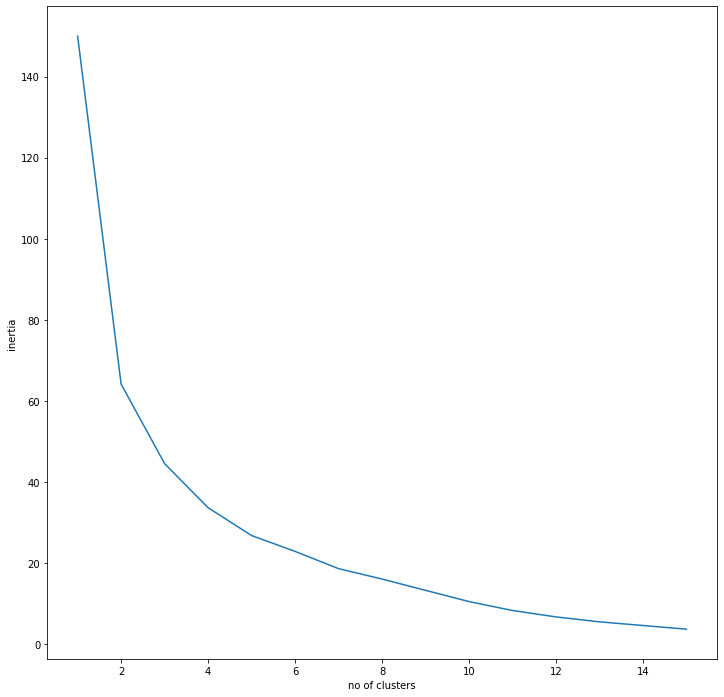

In [44]:
# plot

plt.figure(figsize=(12,12))
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.plot(df['no_of_clus'],df['inertia'])